<a href="https://colab.research.google.com/github/ThomasWork4/CE888/blob/main/labs/lab-2/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [3]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
	Array_Of_Samples = []
	# <---INSERT YOUR CODE HERE--->

	for i in range(n_bootstraps):
		Array_Of_Samples.append(np.random.choice(x, sample_size, replace=True))
	Array_Of_Samples_NP = np.array(Array_Of_Samples)
	data_mean = np.mean(Array_Of_Samples_NP)

	List_Of_Bootstrap_Means = []
	for each_bootstrap in Array_Of_Samples_NP:
		List_Of_Bootstrap_Means.append(np.mean(each_bootstrap))
	List_Of_Bootstrap_Means_NP = np.array(List_Of_Bootstrap_Means)
 
	lower = np.percentile(List_Of_Bootstrap_Means_NP, 2.5)
	upper = np.percentile(List_Of_Bootstrap_Means_NP, 97.5)
 
	return data_mean, lower, upper



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

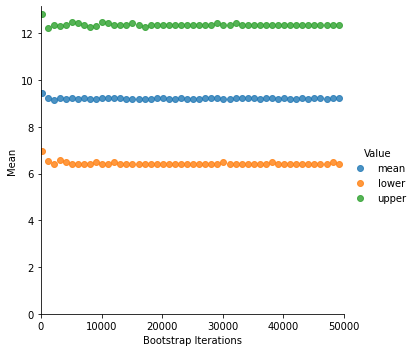

In [4]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [5]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
	Array_Of_Samples = []
	# <---INSERT YOUR CODE HERE--->

	for i in range(n_bootstraps):
		Array_Of_Samples.append(np.random.choice(sample, sample_size, replace=True))
	Array_Of_Samples_NP = np.array(Array_Of_Samples)
	data_mean = np.mean(Array_Of_Samples_NP)

	List_Of_Bootstrap_Means = []
	for each_bootstrap in Array_Of_Samples_NP:
		List_Of_Bootstrap_Means.append(np.mean(each_bootstrap))
	List_Of_Bootstrap_Means_NP = np.array(List_Of_Bootstrap_Means)
  
	lower = np.percentile(List_Of_Bootstrap_Means_NP, (100 - ci) / 2)
	upper = np.percentile(List_Of_Bootstrap_Means_NP, 100 - ((100 - ci) / 2))
	return data_mean, lower, upper


In [32]:
def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
	Array_Of_Samples = []
	# <---INSERT YOUR CODE HERE--->

	for i in range(n_bootstraps):
		Array_Of_Samples.append(np.random.choice(sample, sample_size, replace=True))
	Array_Of_Samples_NP = np.array(Array_Of_Samples)
	data_std = np.std(Array_Of_Samples_NP)

	List_Of_Bootstrap_std = []
	for each_bootstrap in Array_Of_Samples_NP:
		List_Of_Bootstrap_std.append(np.std(each_bootstrap))
	List_Of_Bootstrap_std_NP = np.array(List_Of_Bootstrap_std)
  
	lower = np.percentile(List_Of_Bootstrap_std_NP, (100 - ci) / 2)
	upper = np.percentile(List_Of_Bootstrap_std_NP, 100 - ((100 - ci) / 2))
	return data_std, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

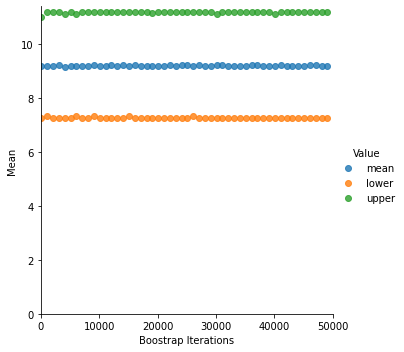

In [6]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [34]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv")
# Note: you can add more cells as needed to organise your code and your plots


In [65]:

current_fleet = df[df.columns[0]].values
new_fleet = df[df.columns[1]].dropna().values

# Moodle Quiz Question 1
#print(bootstrap_mean_ci(current_fleet, current_fleet.shape[0], 1000, 95))
#print(bootstrap_mean_ci(current_fleet, current_fleet.shape[0], 1000, 80))

# Moodle Quiz Question 2
#print(bootstrap_mean_ci(data, data.shape[0], 10000, 85))

# Moodle Quiz Question 3
#print(bootstrap_mean_ci(current_fleet, current_fleet.shape[0], 10000, 80))

# Moodle Quiz Question 4
#print(bootstrap_std_ci(current_fleet, current_fleet.shape[0], 10000, 99))

# Moodle Quiz Question 5
#print(bootstrap_std_ci(data, data.shape[0], 10000, 90))

#sns.distplot(current_fleet, bins=20, kde=False, rug=True)
#sns.distplot(new_fleet, bins=20, kde=False, rug=True)


(5.676926285317484, 3.0110341297654277, 7.095917193451917)


## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [46]:
# <---INSERT YOUR CODE HERE--->

Mean_Current_Fleet = np.mean(current_fleet)
Mean_New_Fleet = np.mean(new_fleet)

CI_For_Current_Fleet = bootstrap_mean_ci(current_fleet, current_fleet.shape[0], 1000, 95)
CI_For_New_Fleet = bootstrap_mean_ci(new_fleet, new_fleet.shape[0], 1000, 95)

print(current_fleet)
#print(Mean_Current_Fleet)
#print(Mean_New_Fleet)


[18 15 18 16 17 15 14 14 14 15 15 14 15 14 22 18 21 21 10 10 11  9 28 25
 19 16 17 19 18 14 14 14 14 12 13 13 18 22 19 18 23 26 25 20 21 13 14 15
 14 17 11 13 12 13 15 13 13 14 22 28 13 14 13 14 15 12 13 13 14 13 12 13
 18 16 18 18 23 11 12 13 12 18 21 19 21 15 16 15 11 20 21 19 15 26 25 16
 16 18 16 13 14 14 14 28 19 18 15 15 16 15 16 14 17 16 15 18 21 20 13 23
 20 23 18 19 25 26 18 16 16 15 22 22 24 23 29 25 20 18 19 18 27 13 17 13
 13 13 30 26 18 17 16 15 18 21 19 19 16 16 16 16 25 26 31 34 36 20 19 20
 19 21 20 25 21 19 21 21 19 18 19 18 18 18 30 31 23 24 22 20 22 20 21 17
 18 17 18 17 16 19 19 36 27 23 24 34 35 28 29 27 34 32 28 26 24 19 28 24
 27 27 26 24 30 39 35 34 30 22 27 20 18 28 27 34 31 29 27 24 23 38 36 25
 38 26 22 36 27 27 32 28 31]


In [54]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    tobs = np.mean(sample2) - np.mean(sample1)
    concat = np.concatenate((sample1, sample2))
    p_value_counter = 0
    for x in range(n_permutations):
      perm = np.random.permutation(concat)
      pold = perm[:int(len(perm)/2)]
      pnew = perm[int(len(perm)/2):]
      tperm = np.mean(pnew) - np.mean(pold)
      if tperm > tobs:
        p_value_counter += 1
    pvalue = p_value_counter / n_permutations 

    return pvalue

# Moodle Quiz Question 7
permut_test(current_fleet, new_fleet, 30000)

0.0

In [61]:
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]
# Moodle Quiz Question 8
#print(len(dem_share_PA))
#print(len(dem_share_OH))
CI_For_PA = bootstrap_mean_ci(dem_share_PA, len(dem_share_PA), 25000, 90)
CI_For_OH = bootstrap_mean_ci(dem_share_OH, len(dem_share_OH), 25000, 90)
#print(CI_For_PA)
#print(CI_For_OH)
permut_test(dem_share_PA, dem_share_OH, 20000)

0.7661